# 가상 쇼핑몰 주문 데이터를 활용한 고객 분석 실습

가상 쇼핑몰 주문 데이터를 통한 고객 분석을 실습한다.

본 실습에서는 다음 내용에 대해 학습한다.
- 고객 코호트 분석 및 활성 유저에 대한 분석
- 매출 분석
- 기타 시각화 등등
특정 주제에 대한 예측 보다는 효과적인 시각화 및 비즈니스 데이터 분석 쪽에서도 필요한 내용을 어떻게 분석하는지 학습하자.
시각화는, 조금 다른 방식으로 plotly를 활용해보고자 한다.


데이터 및 리텐션 파트는 
https://velog.io/@kmnkit/Mini-Project%EC%87%BC%ED%95%91%EB%AA%B0-%EC%A3%BC%EB%AC%B8-%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D-1-%EA%B0%80%EC%83%81-%EC%87%BC%ED%95%91%EB%AA%B0-%EA%B3%A0%EA%B0%9D-%EC%A3%BC%EB%AC%B8-%EB%8D%B0%EC%9D%B4%ED%84%B0-%ED%99%95%EC%9D%B8%ED%95%98%EA%B8%B0
를 보고 따라해보고, 추가로 다른 리텐션을 만들어보았다.

## plotly 패키지 준비

In [1]:
# pip install cufflinks

In [75]:
import numpy as np
import pandas as pd
from chart_studio import plotly as py
import plotly.express as px
import cufflinks as cf
cf.go_offline(connected=True)
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터 로딩 및 기본적인 탐색

데이터는 다음 링크에서 가져왔다.  
https://archive.ics.uci.edu/ml/datasets/Online+Retail

In [3]:
df = pd.read_excel('./Online_Retail.xlsx')

In [4]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


- Invoice No : 송장 번호
- StockCode : Item ID
- Description : 아이템 설명
- Quantity : 아이템 수량
- InvoiceData : 주문 시각
- UnitPrice : 상품가격 ( 통화는 이미 통일되어있다.)
- CustomerID : 고객아이디
- Country : 고객 거주 국가

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


잘 보니까 customerID가 공란인 데이터가 존재한다. 이는 있을 수가 없는 상황이므로 이에 대해 DROP이 필요하다.
description이 null인 데이터가 존재하나,이에 대해서는 크게 문제가 없어 보인다.

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


수량과 가격이 음수일수도 없다. 이에 대해서도 처리해야 할 것이다.
마지막으로, customerID가 숫자로 주어진 것 또한 말이 안 된다...

### 데이터 전처리

In [7]:
df = df[pd.notnull(df['CustomerID'])]

In [8]:
df = df.loc[(df.Quantity > 0) & (df.UnitPrice > 0)]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


유효하지 않은 값 및 결측치가 모두 사라졌다. Description에 대한 결측치도 자연스레 사라졌다.

In [11]:
df['CustomerID'] = df.CustomerID.apply(lambda x : int(x))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


int64형으로 통일시켰다.

### 추가 변수의 생성

위에서 구매수량이랑 개당 단가가 주어졌으므로, 추가적으로 생각해볼 수 있는 변수인 총구매금액을 추가해보자.

In [13]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

## 분석1. 매출에 대해 분석하기

생각해 볼 수 있는 사항들은 다음과 같다.
- 전체 매출
- 국가별 매출
- 월별, 요일별, 시간별 매출
- 유저별 매출
- 상품별 매출 및 Description 분석

In [14]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [15]:
df.TotalPrice.sum()

8911407.904

### 국가별 매출에 대한 시각화

In [16]:
rev_by_country = df.groupby('Country').sum()['TotalPrice'].sort_values()

In [17]:
rev_by_country

Country
Saudi Arabia            1.459200e+02
Bahrain                 5.484000e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Unspecified             2.667070e+03
Malta                   2.725590e+03
USA                     3.580390e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Greece                  4.760520e+03
Israel                  7.221690e+03
Poland                  7.334650e+03
Austria                 1.019868e+04
Cyprus                  1.359038e+04
Italy                   1.748324e+04
Denmark                 1.895534e+04
Channel Islands         2.045044e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.343989e+04
Norway                  3.616544e+04
Japan                   3.7416

국가별  차이가 매우 크다는 것은 숫자로는 확인했다. 하지만 이를 시각화하고자 한다.

In [18]:
px.bar(rev_by_country,
       title = 'total_rev by country',
       y = 'TotalPrice')

In [19]:
total_rev = df.TotalPrice.sum()
rev_by_country / total_rev

Country
Saudi Arabia            0.000016
Bahrain                 0.000062
Czech Republic          0.000093
RSA                     0.000112
Brazil                  0.000128
European Community      0.000146
Lithuania               0.000186
Lebanon                 0.000190
United Arab Emirates    0.000213
Unspecified             0.000299
Malta                   0.000306
USA                     0.000402
Canada                  0.000411
Iceland                 0.000484
Greece                  0.000534
Israel                  0.000810
Poland                  0.000823
Austria                 0.001144
Cyprus                  0.001525
Italy                   0.001962
Denmark                 0.002127
Channel Islands         0.002295
Singapore               0.002388
Finland                 0.002530
Portugal                0.003752
Norway                  0.004058
Japan                   0.004199
Sweden                  0.004307
Belgium                 0.004623
Switzerland             0.006334
Sp

실제로도 비율을 보면 1% 이상을 차지하는 국가도 몇개 안되며, 영국이 82% 이상을 차지하고 있음을 알 수 있다.

### 월별 매출에 대한 분석 및 시각화

월별 매출에 대한 분석을 실시하고자 한다.

In [20]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [21]:
def get_year(date):
    month = date.month
    if month <= 9:
        month = '0' + str(month)
    else:
        month = str(month)
    return str(date.year) + month 

In [22]:
rev_month = df.set_index('InvoiceDate').groupby(get_year).sum()['TotalPrice']
rev_month

201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: TotalPrice, dtype: float64

In [23]:
# 월별 매출에 대한 그래프를 그려보면 다음과 같다.
px.line(rev_month,
        title = 'total_rev by month',
        y = 'TotalPrice')

월별 매출의 그래프를 그려본 결과 9~11월 달의 매출액이 가장 높다는 것을 알 수 있다.
다만, 마지막 12월은 전체 데이터는 아니므로 매출액이 적다라는 것을 알 수 있다.

### 요일별 매출 분석 및 시각화

In [24]:
rev_wod = df.set_index('InvoiceDate').groupby(lambda date : date.dayofweek).sum()['TotalPrice']


0,1,2,3,4,6만 나왔다 5 = 토요일로 , 토요일에 미판매를 하는 것인지 오류인지까지는 알기 어렵다.

In [25]:
rev_wod[5] = 0
rev_wod = rev_wod.sort_index()
px.bar(rev_wod,
        title = 'total_rev by week of day',
        x = ['Mon', 'Tue', 'Wed', 'Thu', 'FRI', 'SAT', 'SUN'],
        y = 'TotalPrice')

매출액 비교 : 목 > 화 > 수 > 금 > 월 > 일

### 시간대별 매출액 비교

In [26]:
rev_hour = df.set_index('InvoiceDate').groupby(lambda date : date.hour).sum()['TotalPrice']

In [27]:
rev_hour

6           4.250
7       31059.210
8      282115.630
9      842605.171
10    1261192.571
11    1104558.750
12    1378571.480
13    1173264.750
14     995629.371
15     966191.750
16     468885.800
17     234413.521
18     104954.430
19      49028.460
20      18932.760
Name: TotalPrice, dtype: float64

6시 ~20 시의 데이터만 존재하며,그나마도 6시는 매우 극소량임을 알 수 있다.

In [28]:
px.line(rev_hour,
        title = 'total_rev by month',
        y = 'TotalPrice')

7시경을 시작으로 주문이 시작되어 12시까지 증가, 조금씩 하락되어다가 15시에서 급락하고 있음을 알 수 있다.

In [29]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


### 구매 제품에 대한 분석

In [30]:
len(df.StockCode.unique())

3665

총 3,665종류의 상품이 거래되었다.

#### 구매 수량에 대한 분석

In [31]:
top_sell_prod = df.groupby('StockCode').sum()['Quantity'].sort_values(ascending = False)

In [32]:
# 상위 10개에 대해서만 출력
top_sell_prod[:10]

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64

#### 구매 금액에 대한 분석

In [33]:
top_price_prod = df.groupby('StockCode').sum()['TotalPrice'].sort_values(ascending = False)
top_price_prod[:10]

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: TotalPrice, dtype: float64

수량과 금액에 대해 모두 1위를 먹은 23843번에 대해서 알아보자.

In [34]:
df.loc[df.StockCode == 23843]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6


해당 상품의 경우, 단 한번만 팔렸지만 많은 수량이 한번에 팔린 것으로 보인다.

### 우수 고객 분석

우수 고객을 총 구매 수량 및 총 구매금액으로 판단할 수 있을 것이다.

In [35]:
# 총 구매 수량 기준
df.groupby('CustomerID').count()['Quantity'].sort_values(ascending = False)

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
         ... 
17846       1
13017       1
13099       1
13106       1
12346       1
Name: Quantity, Length: 4338, dtype: int64

In [36]:
# 총 구매 금액 기준
df.groupby('CustomerID').sum()['TotalPrice'].sort_values(ascending = False)

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
           ...    
16878        13.30
17956        12.75
16454         6.90
14792         6.20
16738         3.75
Name: TotalPrice, Length: 4338, dtype: float64

In [38]:
# 최종적으로 index를 정리하고 Retention 분석을 시작한다.
df = df.reset_index(drop = True)

## 사용자 Retention 분석하기 

사용자 Retention 분석을 위해 Cohort 분석을 진행할 수 있다.

### 리텐션이란?

먼저 리텐션에 대해서 다시 한번 알아보고자 한다.  
리텐션이란, 시간이 지날수록 얼마나 많은 유저가 제품으로 다시 돌아오는지를 측정한 지표이다.  
제품의 성공을 위해서는 리텐션은 높이고, 이탈은 줄여야 한다는 과제가 존재한다.

여기서는 Month별 Retention을 알아보고자 한다.

### 코호트 분석의 방법 및 Code

리텐션 분석을 위해서는 먼저 재방문에 대한 행동을 정의해야 한다.
여기서, 우리는 재방문을 단순히 방문이 아닌 실제 구매를 1회 이상 했는가? 라고 정의를 한다.
한 달에 몇번 구매를 했던 다음달에 구매를 다시 1회 이상 해야 재방문이라고 논할 것이다.

이를 위해 코호트 분석을 적용할 수 있다.

#### 코호트 분석이란?

먼저 코호트란, '동일 기간 내, 공통된 경험을 한 고객 집단'을 의미한다. 즉, 특정 시간대에 따른 고객 그룹을 의미한다.  
ex) 고객을 처음 획득한 일/주/월을 기준으로 그룹화 실시

####  data에서의 실제 적용 - 유저 구매 코호트(1) : 월 1회 이상 구매에 대한 Retention

해야 할 일을 순서대로 적용해보자.
- (1) 구매 월을 구한다.
- (2) 이를 바탕으로 유저별 최초 구매 월을 다시 구한다.
- (3) 최초 구매월과 실제 구매월의 차이를 계산한다.
- (4) 기준 월과 실제 구매월의 차이를 바탕으로 고객을 카운팅한다.
- (5) Data를 Pivoting 하고, Heatmap을 출력한다.
- (6) Retention을 해석한다.

In [39]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [48]:
# 1단계 구매 월을 구한다.
def get_month_from_datetime(date):
    # 구매연, 월, 그리고 최초 1일을 돌려준다.
    return datetime(date.year, date.month, 1)
df['Month'] = df['InvoiceDate'].apply(lambda t : get_month_from_datetime(t))

# 2단계 최초 구매월의 계산
month_group = df.groupby('CustomerID')['Month']
df['StartedMonth'] = month_group.transform(np.min)

groupby-merge할 필요 없이 transform을 통해서 쉽게 해결 가능하다! 아주 좋은 방법이다.!

In [56]:
# 3단계 최초 구매월 ~ 실 구매월 몇달 차이 나는가?
# 주의! 연이 넘어가는 차이가 존재한다. 혹은 그렇게 데이터가 들어올 때를 대비해야한다.
df['MonthPassed'] = (df['Month'].dt.year - df['StartedMonth'].dt.year) * 12 +\
  (df['Month'].dt.month - df['StartedMonth'].dt.month)

In [63]:
# 4단계 몇 번을 구매했던 간에 1번의 구매 횟수로 반영해야 한다.

def get_unique_ids_cnt(x):
    # 해당 최초 구매월에서 최초 경과월 수 만큼 몇 명의 유저가 구매했는가?
    return len(np.unique(x))

cohort_group = df.groupby(['StartedMonth', 'MonthPassed'])
cohort_df = cohort_group['CustomerID'].apply(get_unique_ids_cnt).reset_index()

In [64]:
cohort_df

,StartedMonth,MonthPassed,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321
...,...,...,...
86,2011-10-01,1,86
87,2011-10-01,2,41
88,2011-11-01,0,323
89,2011-11-01,1,36


다음과 같이 시작월, 그리고 경과 월에 따른 유저 수를 얻을 수 있다. 이제 이를 pivot 시키면 된다.

In [65]:
# 5단계 pivoting
cohort_pivoted = cohort_df.pivot(index = 'StartedMonth', columns = 'MonthPassed')
cohort_pivoted

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
StartedMonth                                                               
2010-12-01        885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
2011-01-01        417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02-01        380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03-01        452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04-01        300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   
2011-05-01        284.0   54.0   49.0   49.0   59.0   66.0   75.0   27.0   
2011-06-01        242.0   42.0   38.0   64.0   56.0   81.0   23.0    NaN   
2011-07-01        188.0   34.0   39.0   42.0   51.0   21.0    NaN    NaN   
2011-08-01        169.0   35.0   42.0   41.0   21.0    NaN    NaN    NaN   
2011-09-01        299.0   70.0   90.0   34.0    NaN    NaN    NaN    NaN   
2011-10-01        358.0   86.0   41.0    NaN    NaN    NaN    NaN    NaN   
2011-11-01        323.0   36.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01         41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                 
MonthPassed      8      9      10     11     12  
StartedMonth                                     
2010-12-01    313.0  350.0  331.0  445.0  235.0  
2011-01-01    125.0  136.0  152.0   49.0    NaN  
2011-02-01     94.0  116.0   26.0    NaN    NaN  
2011-03-01    126.0   39.0    NaN    NaN    NaN  
2011-04-01     22.0    NaN    NaN    NaN    NaN  
2011-05-01      NaN    NaN    NaN    NaN    NaN  
2011-06-01      NaN    NaN    NaN    NaN    NaN  
2011-07-01      NaN    NaN    NaN    NaN    NaN  
2011-08-01      NaN    NaN    NaN    NaN    NaN  
2011-09-01      NaN    NaN    NaN    NaN    NaN  
2011-10-01      NaN    NaN    NaN    NaN    NaN  
2011-11-01      NaN    NaN    NaN    NaN    NaN  
2011-12-01      NaN    NaN    NaN    NaN    NaN

다음과 같이 유저 수의 변화를 알 수 있다. 그러나 실제 분석에서는 유저 수 그 자체 보다도 비율을 보는게 중요하므로 전부 백분위로 바꿔줘야 한다.

In [85]:
# div를 통해서 전체를 줄별로 나눠줄 수 있다.
retention_df = cohort_pivoted.div(cohort_pivoted.iloc[:, 0], axis = 0) * 100
retention_df = retention_df.round(decimals = 2)

In [86]:
retention_df

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
StartedMonth                                                               
2010-12-01        100.0  36.61  32.32  38.42  36.27  39.77  36.27  34.92   
2011-01-01        100.0  22.06  26.62  23.02  32.13  28.78  24.70  24.22   
2011-02-01        100.0  18.68  18.68  28.42  27.11  24.74  25.26  27.89   
2011-03-01        100.0  15.04  25.22  19.91  22.35  16.81  26.77  23.01   
2011-04-01        100.0  21.33  20.33  21.00  19.67  22.67  21.67  26.00   
2011-05-01        100.0  19.01  17.25  17.25  20.77  23.24  26.41   9.51   
2011-06-01        100.0  17.36  15.70  26.45  23.14  33.47   9.50    NaN   
2011-07-01        100.0  18.09  20.74  22.34  27.13  11.17    NaN    NaN   
2011-08-01        100.0  20.71  24.85  24.26  12.43    NaN    NaN    NaN   
2011-09-01        100.0  23.41  30.10  11.37    NaN    NaN    NaN    NaN   
2011-10-01        100.0  24.02  11.45    NaN    NaN    NaN    NaN    NaN   
2011-11-01        100.0  11.15    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01        100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                 
MonthPassed      8      9      10     11     12  
StartedMonth                                     
2010-12-01    35.37  39.55  37.40  50.28  26.55  
2011-01-01    29.98  32.61  36.45  11.75    NaN  
2011-02-01    24.74  30.53   6.84    NaN    NaN  
2011-03-01    27.88   8.63    NaN    NaN    NaN  
2011-04-01     7.33    NaN    NaN    NaN    NaN  
2011-05-01      NaN    NaN    NaN    NaN    NaN  
2011-06-01      NaN    NaN    NaN    NaN    NaN  
2011-07-01      NaN    NaN    NaN    NaN    NaN  
2011-08-01      NaN    NaN    NaN    NaN    NaN  
2011-09-01      NaN    NaN    NaN    NaN    NaN  
2011-10-01      NaN    NaN    NaN    NaN    NaN  
2011-11-01      NaN    NaN    NaN    NaN    NaN  
2011-12-01      NaN    NaN    NaN    NaN    NaN

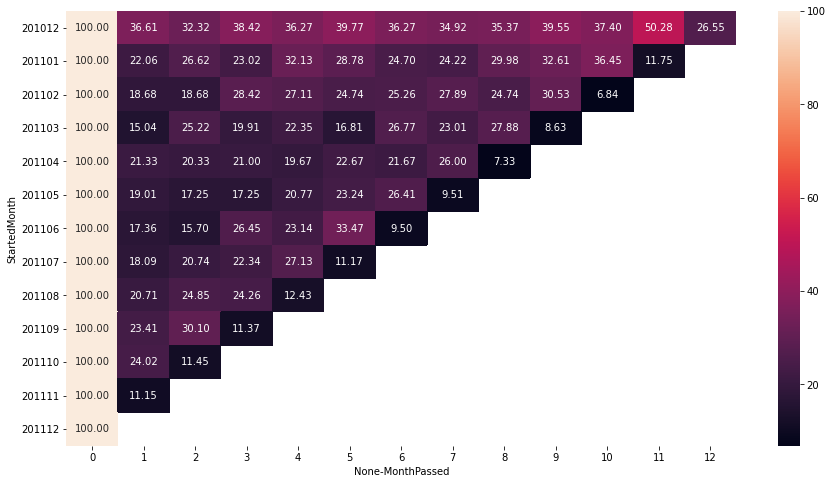

In [88]:
# 6단계 heatmap으로 시각화를 실시한다.
xlabel = np.arange(0, 13)
ylabel = ['201012', '201101', '201102', '201103', '201104', '201105', '201106', '201107',
                   '201108', '201109', '201110', '201111', '201112']

plt.figure(figsize = (15, 8))
sns.heatmap(retention_df, xticklabels = xlabel, yticklabels = ylabel,
            annot = True, fmt = '.2f')
plt.show()

retention cohort에 대한 해석

####  data에서의 실제 적용 - 유저 구매 코호트(2) : 월별 구매액에 대한 코호트

재방문율 뿐만이 아니라 구매 금액에 대해서도 코호트를 적용할 수 있을 것이다.